# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составьте первое представление о данных Яндекс.Музыки.




In [1]:
# импорт библиотеки pandas
import pandas as pd 

In [7]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('datasets/yandex_music_project.csv') 

In [8]:
# получение первых 10 строк таблицы df
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [10]:
# получение последних 10 строк таблицы df

df.tail(5)

,userID,Track,artist,genre,City,time,Day
65074,729CBB09,My Name,McLean,rnb,Moscow,13:32:28,Wednesday
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Saint-Petersburg,10:00:00,Monday
65076,C5E3A0D5,Jalopiina,NaN,industrial,Moscow,20:09:26,Friday
65077,321D0506,Freight Train,Chas McDevitt,rock,Moscow,21:43:59,Friday
65078,3A64EF84,Tell Me Sweet Little Lies,Monica Lopez,country,Moscow,21:59:46,Friday


In [11]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Из названий стобцов 'time' и 'day' непонятно, что они конкретно обозначают.



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправьте стиль в заголовках столбцов, исключите пропуски. Затем проверьте данные на дубликаты.

### Стиль заголовков

In [12]:
# перечень названий столбцов таблицы df
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [13]:
# переименование столбцов
df = df.rename(columns={
    '  userID': 'user_id',
    'Track': 'track',
    '  City  ': 'city',
    'time': 'listening_start_time',
    'Day': 'day_of_week'}) 

In [14]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'listening_start_time',
       'day_of_week'],
      dtype='object')

### Пропуски значений

In [15]:
# подсчёт пропусков
df.isna().sum()

user_id                    0
track                   1231
artist                  7203
genre                   1198
city                       0
listening_start_time       0
day_of_week                0
dtype: int64

In [16]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for col in columns_to_replace:
    df[col] = df[col].fillna('unknown')

In [17]:
# подсчёт пропусков
df.isna().sum()

user_id                 0
track                   0
artist                  0
genre                   0
city                    0
listening_start_time    0
day_of_week             0
dtype: int64

### Дубликаты

In [18]:
# подсчёт явных дубликатов
df.duplicated().sum()

3826

In [19]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

In [20]:
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [21]:
# Просмотр уникальных названий жанров
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

In [22]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    for genre in wrong_genres:
        df['genre'] = df['genre'].replace(genre, correct_genre)

In [23]:
# Устранение неявных дубликатов
replace_wrong_genres(['hip','hip-hop','hop'], 'hiphop')
replace_wrong_genres(['электроника'],'electronic')
replace_wrong_genres(['ïîï'],'pop')
replace_wrong_genres(['latino'],'latin')
replace_wrong_genres(['extrememetal'],'experimental')
replace_wrong_genres(['chanson'],'shanson')

In [24]:
# Проверка на неявные дубликаты
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'children', 'chill', 'chinese',
       'choral', 'christian', 'christmas', 'classical', 'classicmetal',
       'club', 'colombian', 'comedy', 'conjazz', 'contemporary',
       'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark',
       'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco',
       'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub',
       'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo',
       'entehno', 'epicmetal',

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге.

In [25]:
# Подсчёт прослушиваний в каждом городе
spb_general = df[df['city'] == 'Saint-Petersburg'] # слушатели в Санкт-Петербурге
moscow_general = df[df['city'] == 'Moscow'] # слушатели в Москве

print(f"Прослушивания в Санкт-Петербурге: {spb_general['user_id'].count()}")
print(f"Прослушивания в Москве: {moscow_general['user_id'].count()}")

Прослушивания в Санкт-Петербурге: 18512
Прослушивания в Москве: 42741


В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

/Users/olesya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

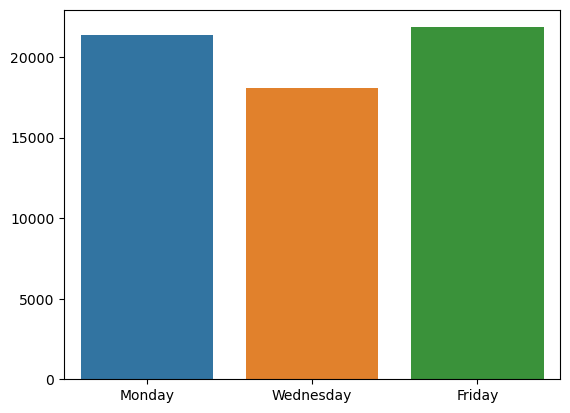

In [26]:
# Подсчёт прослушиваний в каждый из трёх дней
df_grouped_by_day = df.groupby('day_of_week')['user_id'].count()

days = ['Monday', 'Wednesday', 'Friday']
listinings_by_day = []
for day in days:
    listinings_by_day.append(df_grouped_by_day[day])
    
# Визуализируем данные
import seaborn as sns
sns.barplot(days, listinings_by_day)

In [27]:
# Функция для определения количества прослушиваний для заданного дня и города

def number_tracks(day, city):
    track_list = df[df['day_of_week'] == day]
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count

In [28]:
# Найдем количество прослушиваний по городам и дням недели
days_of_week = {'Monday': 'понедельникам', 'Wednesday': 'средам', 'Friday': 'пятницам'}
cities = {'Moscow': 'Москве', 'Saint-Petersburg': 'Санкт-Петербурге'}

listenings_by_day = {'city': ['Moscow', 'Saint-Petersburg']} # этот словарь поможет нам на следующем этапе

for day in days_of_week:
    listenings_by_day[day] = []
    for city in cities:
        listened_tracks = number_tracks(day, city)
        print(f'Количество прослушиваний в {cities[city]} по {days_of_week[day]}: {listened_tracks}')
        listenings_by_day[day].append(listened_tracks)
    print()

Количество прослушиваний в Москве по понедельникам: 15740
Количество прослушиваний в Санкт-Петербурге по понедельникам: 5614

Количество прослушиваний в Москве по средам: 11056
Количество прослушиваний в Санкт-Петербурге по средам: 7003

Количество прослушиваний в Москве по пятницам: 15945
Количество прослушиваний в Санкт-Петербурге по пятницам: 5895



In [23]:
# Таблица с результатами
city_comparison = pd.DataFrame(listenings_by_day)
city_comparison

,city,Monday,Wednesday,Friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [29]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general.head()

,user_id,track,artist,genre,city,listening_start_time,day_of_week
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,unknown,ruspop,Moscow,09:17:40,Friday


In [30]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general.head()

,user_id,track,artist,genre,city,listening_start_time,day_of_week
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
9,E772D5C0,Pessimist,unknown,dance,Saint-Petersburg,21:20:49,Wednesday


In [31]:
# Функция для подсчета самых популярных жанров в заданный день и заданное время
def genre_weekday(table, day, time1, time2):
    genre_df = table[table['day_of_week'] == day]
    genre_df = genre_df[genre_df['listening_start_time'] > time1]
    genre_df = genre_df[genre_df['listening_start_time'] < time2]
    genre_df_count = genre_df.groupby('genre').count()
    genre_df_sorted = genre_df_count.sort_values(by='track', ascending=False)
    return genre_df_sorted['track'][:10]

<AxesSubplot:ylabel='genre'>

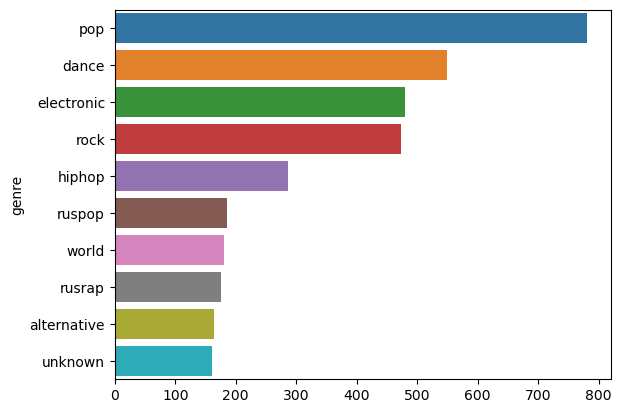

In [32]:
# вызов функции для определения самых популярных жанров в Москве в понедельник утром
moscow_monday_morning_genres = genre_weekday(moscow_general, 'Monday', '07:00', '11:00')

# визуализируем данные
sns.barplot(x=moscow_monday_morning_genres.values, y=moscow_monday_morning_genres.index)

<AxesSubplot:ylabel='genre'>

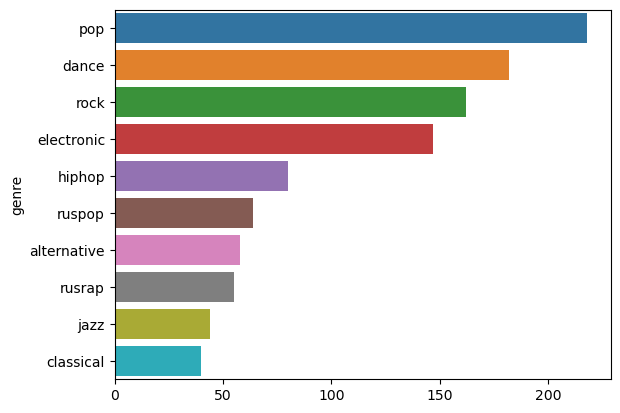

In [33]:
# вызов функции для определения самых популярных жанров в Санкт-Петербурге в понедельник утром
spb_monday_morning_genres = genre_weekday(spb_general, 'Monday', '07:00', '11:00')

# визуализируем данные
sns.barplot(x=spb_monday_morning_genres.values, y=spb_monday_morning_genres.index)

<AxesSubplot:ylabel='genre'>

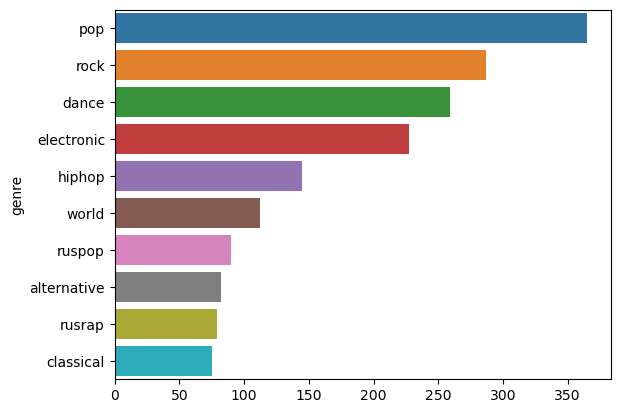

In [34]:
# вызов функции для определения самых популярных жанров в Москве в пятницу вечером
moscow_friday_evening_genres = genre_weekday(moscow_general, 'Friday', '17:00', '21:00')

# визуализируем данные
sns.barplot(x=moscow_friday_evening_genres.values, y=moscow_friday_evening_genres.index)

<AxesSubplot:ylabel='genre'>

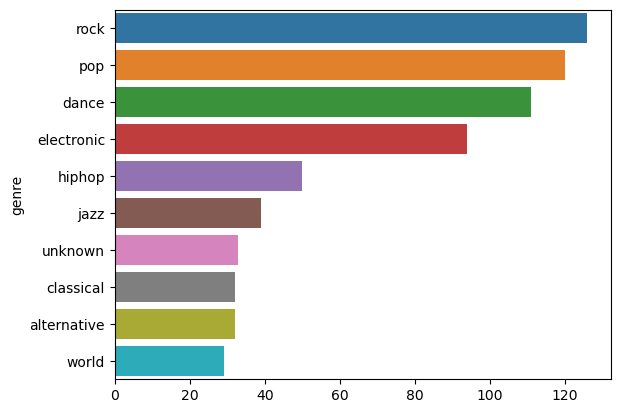

In [35]:
# вызов функции для определения самых популярных жанров в Санкт-Петербурге в пятницу вечером
spb_friday_evening_genres = genre_weekday(spb_general, 'Friday', '17:00', '21:00')

# визуализируем данные
sns.barplot(x=spb_friday_evening_genres.values, y=spb_friday_evening_genres.index)

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [36]:
# Созданим Series с самыми популярными жанрами в Москве
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending=False)

In [37]:
# просмотр первых 10 строк moscow_genres
moscow_genres.head(10)

genre
pop            5893
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

In [38]:
# Созданим Series с самыми популярными жанрами в Санкт-Петербурге
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)

In [39]:
# просмотр первых 10 строк spb_genres
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64

Позиции рэпа и поп-музыки в топе самых прослушиваемых жанров оказались примерно одинаковыми в двух городах. Но для того чтобы говорить о том, что тот или иной жанр популярнее в определенном городе, сравним их относительные значения. Для этого вычислим доли прослушивания относительно каждого из городов по жанрам типа поп (pop, ruspop) и рэп (rap, hiphop, rusrap).

Создадим функцию get_genres_percantage, которая будет принимать данные по определенному городу и возвращать Series с долями прослушивания жанров относительно города:

In [40]:
# Создадим функцию, которая возвращает относительные значения популярности жанров
def get_genres_percantage(data):
    genres_count = data.groupby(by='genre')['user_id'].count().sort_values(ascending=False)
    genres_percantage = genres_count / data['genre'].count()
    return genres_percantage

Выделим Series по каждому городу с исследуемыми нами жанрами. Индексами будут названия жанров, а значениями доли жанров:

In [41]:
# Найдем относительные значения прослушиваний по Санкт-Петербургу
spb_genres_percentage = get_genres_percantage(spb_general)[['rap', 'pop', 'rusrap', 'ruspop', 'hiphop']]

In [42]:
# Найдем относительные значения прослушиваний по Москве
msk_genres_percentage = get_genres_percantage(moscow_general)[['rap', 'pop', 'rusrap', 'ruspop', 'hiphop']]

Объединим полученные Series в общую таблицу и добавим столбец 'difference' в котором сохраним разницу долей в процентах:

In [43]:
# Создадим таблицу сравнения относительных прослушиваний среди жанров поп и рэп
msk_spb = pd.merge(msk_genres_percentage, spb_genres_percentage, on='genre')
msk_spb.columns = ['moskow', 'saint_petersburg']
msk_spb['difference'] = abs((1 - (msk_spb['moskow'] / msk_spb['saint_petersburg'])))

In [44]:
# Выведем таблицу сравнения с форматированием, сортированную по разнице в относительных значениях
msk_spb.sort_values(by='difference', ascending=False).style.format('{:.2%}')

,moskow,saint_petersburg,difference
genre,,,
rap,1.27%,1.67%,23.89%
rusrap,2.72%,3.05%,10.84%
ruspop,3.21%,2.91%,10.45%
hiphop,4.90%,5.19%,5.44%
pop,13.79%,13.13%,4.99%


Наиболее ярковыраженные отличия в долях заметны в жанре rap, в Петербурге его доля почти на 24% выше чем в Москве. Более того, остальные жанры типа рэп (hiphop, rusrap), также занимают бОльшую долю в Петербурге. А вот доля жанров типа поп (pop, ruspop) выше в Москве.

**Выводы**

Гипотеза подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Хоть в рейтинге самых популярных жанров рэп-музыка в Москве и Санкт-Петербурге находятся примерно на одинаковых позициях, но если посмотреть по долям популярности, то в Петербурге доля прослушиваний рэпа и близких к нему жанров выше, чем в Москве.

## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Жанр поп-музыки самый популярный в обоих городах. Относительно жанра рэп-музыки, то согласно долям популярности этого и близкого к нему жанров в Петербурге, действительно, его предпочитают больше чем в Москве.

Третья гипотеза подтвердилась.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
С методами проверок гипотез вы ещё познакомитесь в следующих темах.